In [2]:
import pandas as pd
df = pd.read_csv(r'.\Bets_huge\clean_bets_huge.csv')

In [3]:
df.head(10)

,action_amount
0,0.45
1,0.15
2,0.15
3,0.30
4,0.30
5,0.36
6,0.15
7,0.60
8,0.60
9,0.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651467 entries, 0 to 651466
Data columns (total 1 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   action_amount  651467 non-null  float64
dtypes: float64(1)
memory usage: 5.0 MB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

* Maximum and minimum values.
* Average.
* Standard deviation and variance.
* Skewness and kurtosis using scipy.stats.
* Standard errors of skewness and kurtosis.
* 90%, 95%, and 99% confidence limits for mean using 'scipy.stats.t.interval'.

In [6]:
from scipy import stats

def show_stats(data):
    print("Max: ", data.max(), " Min: ", data.min(), " Std: ", data.std())
    print("Mean: ", data.mean(), " Median: ", data.median())

show_stats(df["action_amount"])

Max:  99.0  Min:  0.1  Std:  5.163955883137021
Mean:  1.3403303313905395  Median:  0.3


In [7]:
import numpy as np
from scipy import stats

def remove_outliers(df, columns, threshold=3):
    df_out = df.copy()
    for col in columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        filtered_entries = (abs_z_scores < threshold)
        df_out = df_out[filtered_entries]
    return df_out

In [84]:
#cleaned_df = remove_outliers(df, ['action_amount'])

In [8]:
from fitter import Fitter, get_common_distributions

distributions_set = get_common_distributions()

2024-05-04 23:01:56.478 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.122665)
2024-05-04 23:01:56.532 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.593216)
2024-05-04 23:01:56.769 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.697477)
2024-05-04 23:01:57.283 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.553596)
2024-05-04 23:01:58.464 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.170726)
2024-05-04 23:02:00.290 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.304859)
2024-05-04 23:02:01.977 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.490437)
2024-05-04 23:02:22.695 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

{'expon': {'loc': 0.1, 'scale': 1.2403303313905394}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.122665,8020.757840,8043.531804,inf,0.443330,0.0
lognorm,0.170726,1984.653839,2018.814785,inf,0.097557,0.0
cauchy,0.304859,2075.612976,2098.386940,inf,0.248261,0.0
chi2,0.357238,1752.978294,1787.139240,inf,0.274681,0.0
powerlaw,0.490437,1125.247360,1159.408306,inf,0.372646,0.0


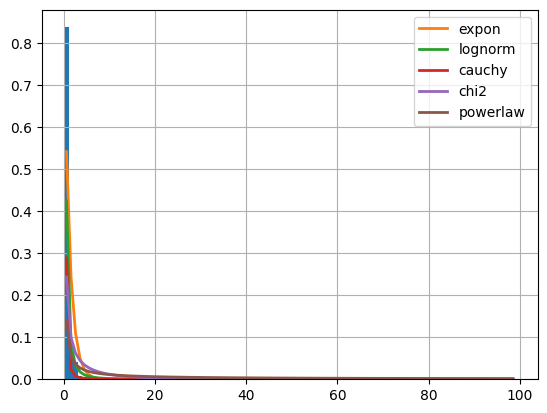

In [9]:
f = Fitter(df["action_amount"], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [91]:
#df = df.reset_index(drop=True)

,action_amount
0,0.45
1,0.15
2,0.15
3,0.30
4,0.30


In [10]:
from sklearn.cluster import KMeans

data = df["action_amount"].copy()
kmeans = KMeans(n_clusters=3, n_init="auto", algorithm="elkan", random_state = 0).fit(data.values.reshape(-1, 1))
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 0.74682853]
 [23.73689333]
 [64.14534884]]
[0 0 0 ... 0 0 0]


In [11]:
df1 = []
df2 = []
df3 = []
i = 0
for x in kmeans.labels_:
    if x == 0:
        df1.append(data.loc[i])
    elif x == 1:
        df2.append(data.loc[i])
    else:
        df3.append(data.loc[i])
    i += 1

df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)
df3 = pd.DataFrame(df3)
print(df1.head())
print(df2.head())
print(df3.head())

      0
0  0.45
1  0.15
2  0.15
3  0.30
4  0.30
      0
0  30.0
1  24.0
2  21.6
3  15.0
4  30.0
      0
0  60.0
1  60.0
2  60.0
3  60.0
4  60.0


In [23]:
#export to csv
df1.to_csv('clean_bets_huge_low.csv', index=False)
df2.to_csv('clean_bets_huge_med.csv', index=False)
df3.to_csv('clean_bets_huge_high.csv', index=False)

df1.value_counts(sort=False).to_csv('clean_bets_huge_freq_low.csv')
df2.value_counts(sort=False).to_csv('clean_bets_huge_freq_med.csv')
df3.value_counts(sort=False).to_csv('clean_bets_huge_freq_high.csv')

Max:  12.24  Min:  0.1  Std:  1.413974563991747
Mean:  0.7468285346275259  Median:  0.3


2024-05-04 23:03:13.425 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=11.596797)
2024-05-04 23:03:13.475 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=4.5299)
2024-05-04 23:03:13.697 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=13.794585)
2024-05-04 23:03:14.048 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=10.85437)
2024-05-04 23:03:15.382 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.490324)
2024-05-04 23:03:16.993 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=2.476391)
2024-05-04 23:03:17.877 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=6.459439)
2024-05-04 23:03:39.340 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

{'lognorm': {'s': 1.534076756183811, 'loc': 0.09856371769285532, 'scale': 0.19677005949905801}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.490324,1031.511158,1065.613935,0.210559,0.087208,0.0
cauchy,2.476391,1233.436514,1256.171699,0.232156,0.243468,0.0
gamma,2.869389,1279.281588,1313.384365,0.271775,0.334136,0.0
chi2,3.211970,1010.876314,1044.979091,0.504895,0.182932,0.0
expon,4.529900,1793.714984,1816.450169,0.502271,0.327336,0.0


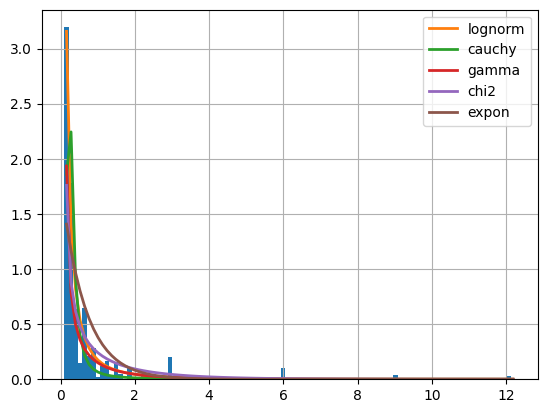

In [12]:
show_stats(df1[0])
f = Fitter(df1[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

2024-05-04 23:03:58.488 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.01942)
2024-05-04 23:03:58.501 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1.023451)
2024-05-04 23:03:58.549 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.02986)


Max:  43.5  Min:  12.27  Std:  7.818208524423756
Mean:  23.736893329356793  Median:  21.6


2024-05-04 23:03:58.646 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=1.018769)
2024-05-04 23:03:58.718 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.01503)
2024-05-04 23:03:58.739 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.037905)
2024-05-04 23:03:58.775 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=1.023925)
2024-05-04 23:03:58.926 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1.008775)
2024-05-04 23:03:58.994 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1.008776)
2024-05-04 23:03:59.310 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=1.347648)


{'gamma': {'a': 1.7637800081021044, 'loc': 12.192837188503528, 'scale': 6.545042972627357}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,1.008775,756.293064,777.941733,inf,0.158313,1.111534e-220
chi2,1.008776,756.292979,777.941648,inf,0.158313,1.111213e-220
lognorm,1.015030,765.365762,787.014431,inf,0.163499,1.954638e-235
rayleigh,1.018769,749.623706,764.056152,inf,0.156245,6.206185e-215
expon,1.019420,764.242076,778.674522,inf,0.161157,1.032874e-228


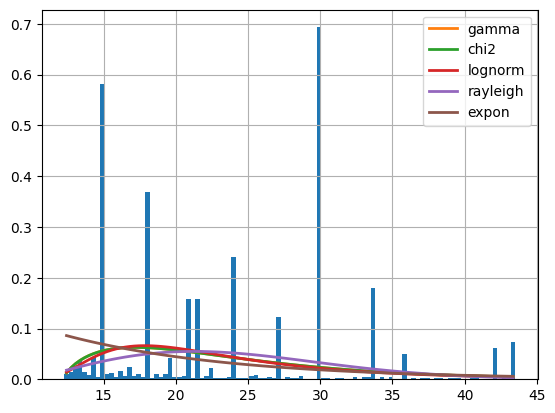

In [13]:
show_stats(df2[0])
f = Fitter(df2[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

2024-05-04 23:04:11.029 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.707735)
2024-05-04 23:04:11.041 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.711714)
2024-05-04 23:04:11.060 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.712925)
2024-05-04 23:04:11.091 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.707873)
2024-05-04 23:04:11.108 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.704973)
2024-05-04 23:04:11.205 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.710806)


Max:  99.0  Min:  44.16  Std:  14.865233112895066
Mean:  64.1453488372093  Median:  60.0


2024-05-04 23:04:11.262 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.696775)
2024-05-04 23:04:11.370 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.703495)
2024-05-04 23:04:11.487 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.882339)
2024-05-04 23:04:11.568 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponpow distribution with error=0.705567)


{'cauchy': {'loc': 59.87204343140618, 'scale': 6.0131636879474195}}


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.696775,962.551817,974.160319,inf,0.225663,3.727825e-110
gamma,0.703495,869.406756,886.819510,inf,0.217871,1.251649e-102
lognorm,0.704973,882.310990,899.723744,inf,0.233926,1.931732e-118
exponpow,0.705567,847.621483,865.034237,inf,0.194672,7.547337e-82
expon,0.707735,877.400904,889.009407,inf,0.266215,7.740319e-154


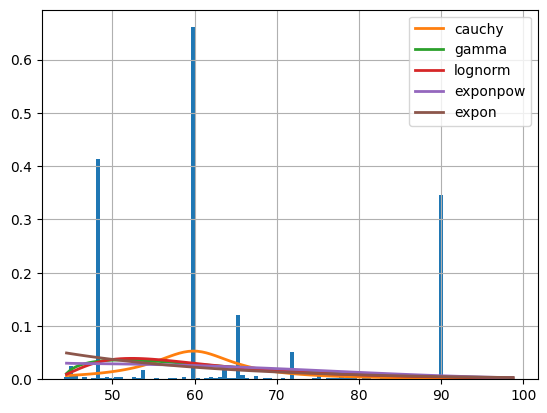

In [14]:
show_stats(df3[0])
f = Fitter(df3[0], distributions = distributions_set)
f.fit()
print(f.get_best())
f.summary()

In [18]:
import math
# Define range size
range_size = 0.1

# Calculate min and max values
min_value = df1[0].min()
max_value = df1[0].max()

# Generate bins
bins = np.arange(math.floor(min_value * 10)/10, max_value + range_size, range_size)
bins = np.round(bins, 2)

# Categorize values into ranges and count frequencies
frequency = pd.cut(df1[0], bins=bins).value_counts().sort_index()

# Extract start and end of range from bins
start_of_range = bins[:-1]
end_of_range = bins[1:]

# Create dataframe with start of range, end of range, and frequencies
result_df = pd.DataFrame({'Start of Range': start_of_range,
                          'End of Range': end_of_range,
                          'Frequency': frequency.values})

result_df.to_csv('clean_bets_huge_range_low.csv', index=False)

In [21]:
# Calculate min and max values
min_value = df2[0].min()
max_value = df2[0].max()

# Generate bins
bins = np.arange(math.floor(min_value * 10)/10, max_value + range_size, range_size)
bins = np.round(bins, 2)

# Categorize values into ranges and count frequencies
frequency = pd.cut(df2[0], bins=bins).value_counts().sort_index()

# Extract start and end of range from bins
start_of_range = bins[:-1]
end_of_range = bins[1:]

# Create dataframe with start of range, end of range, and frequencies
result_df = pd.DataFrame({'Start of Range': start_of_range,
                          'End of Range': end_of_range,
                          'Frequency': frequency.values})

result_df.to_csv('clean_bets_huge_range_med.csv', index=False)

In [22]:
# Calculate min and max values
min_value = df3[0].min()
max_value = df3[0].max()

# Generate bins
bins = np.arange(math.floor(min_value * 10)/10, max_value + range_size, range_size)
bins = np.round(bins, 2)

# Categorize values into ranges and count frequencies
frequency = pd.cut(df3[0], bins=bins).value_counts().sort_index()

# Extract start and end of range from bins
start_of_range = bins[:-1]
end_of_range = bins[1:]

# Create dataframe with start of range, end of range, and frequencies
result_df = pd.DataFrame({'Start of Range': start_of_range,
                          'End of Range': end_of_range,
                          'Frequency': frequency.values})

result_df.to_csv('clean_bets_huge_range_high.csv', index=False)